In [25]:
# Dependencies
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Setup API Key
from config import api_key

# Import citipy to generate cities
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

In [2]:
# Create lists to hold coordinates and cities
coord = []
cities = []

# Create random set of latitiudes and longitudes and put them in coord[]
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
coord = zip(lat, lng)

# Id the nearest city for each coordinate
for x in coord:
    city = citipy.nearest_city(x[0], x[1]).city_name
    
    # Append the city into list if it's not already in
    if city not in cities:
        cities.append(city)

# Visualize and make sure we have 500+ cities
print(len(cities))

605


### Perform a weather check on each of the cities using a series of successive API calls.
### Include a print log of each city as it's being processed with the city number and city name.

In [3]:
# Build url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


# Create empty lists to append datas
city_name = []
cloudiness = []
country = []
hum = []
lats = []
lngs = []
max_temp = []
wind_spd = []

# Set city number counter for data retrieval log 
counter = 1

# Print data retrieval log
print(f"Retrieving Data")
print(f"Printing logs")
print(f"---------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Implementing try statement in case cities generated are not available 
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        hum.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        wind_spd.append(response["wind"]["speed"])
        city_num_name = response["name"]

        print(f"Processing city number {counter} | {city_num_name}")
        print(f"{url}&q={city}")
        
        
        counter= counter + 1
        
        # Counter the rate limit of API # Need to revisit
        time.sleep(1)
        
    # Except statment if OpenWeather doesn't have the cities we want
    except:
        print("City not available, skipping")

    continue

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b51fa59ea52ed7b86c307d01e28cc1b0&q=bud
Processing city number 425 | Fort Nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b51fa59ea52ed7b86c307d01e28cc1b0&q=fort nelson
Processing city number 426 | Moose Factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b51fa59ea52ed7b86c307d01e28cc1b0&q=moose factory
Processing city number 427 | Nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b51fa59ea52ed7b86c307d01e28cc1b0&q=nabire
Processing city number 428 | Port Hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b51fa59ea52ed7b86c307d01e28cc1b0&q=port hedland
Processing city number 429 | Huntington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b51fa59ea52ed7b86c307d01e28cc1b0&q=huntington
Processing city number 430 | Padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b51fa59ea52ed7b

In [13]:
# Create a DataFrame with data collected to plot the graphs
weather_df = pd.DataFrame({
     "City": city_name,
     "Cloudiness": cloudiness,
     "Country": country,
     "Humidity": hum,
     "Latitude": lats,
     "longitude": lngs,
     "Max Temperature": max_temp,
     "Wind Speed": wind_spd,
     })


print(len(weather_df["City"]))     
weather_df.head()

554


,City,Cloudiness,Country,Humidity,Latitude,longitude,Max Temperature,Wind Speed
0,Hermanus,90,ZA,82,-34.42,19.23,62.01,4.00
1,Dubti,0,ET,57,11.74,41.09,76.21,6.51
2,Amuntai,1,ID,88,-2.42,115.25,77.36,0.83
3,Yangjiang,84,CN,50,21.85,111.97,69.19,7.94
4,Atuona,85,PF,76,-9.80,-139.03,77.61,15.79


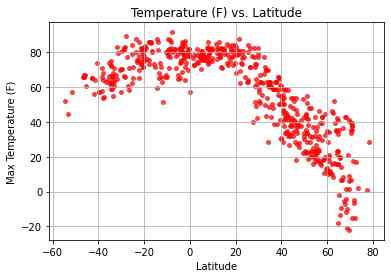

<Figure size 432x288 with 0 Axes>

In [14]:
# Scatter Plot: Temperature (F) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], marker= "o", color= "r", alpha= 0.7, s= 15)
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.tight_layout()

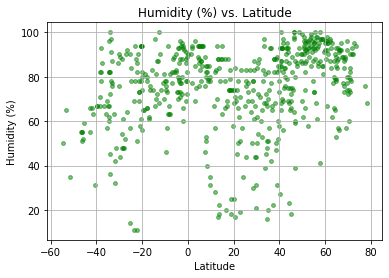

<Figure size 432x288 with 0 Axes>

In [15]:
# Scatter Plot: Humidity (%) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker= "o", color= "g", alpha= 0.5, s= 15)
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.tight_layout()

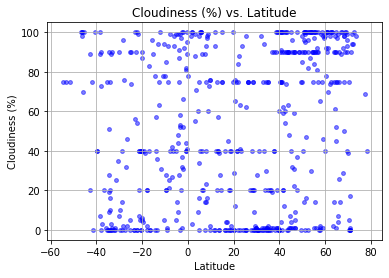

<Figure size 432x288 with 0 Axes>

In [16]:
# Scatter Plot: Cloudiness (%) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker= "o", color= "b", alpha= 0.5, s= 15)
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.tight_layout()

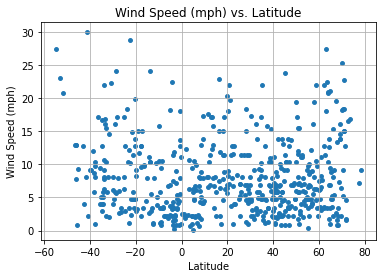

<Figure size 432x288 with 0 Axes>

In [17]:
# Scatter Plot: Wind Speed (mph) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker= "o", s= 15)
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.tight_layout()

In [19]:
# Create DF for cities in north hemisphere and south hemisphere
nor_hem_df = weather_df.loc[weather_df["Latitude"] >= 0.0]
so_hem_df = weather_df.loc[weather_df["Latitude"] < 0.0]

In [21]:
nor_hem_df.head()

,City,Cloudiness,Country,Humidity,Latitude,longitude,Max Temperature,Wind Speed
1,Dubti,0,ET,57,11.74,41.09,76.21,6.51
3,Yangjiang,84,CN,50,21.85,111.97,69.19,7.94
6,Agüimes,20,ES,50,27.91,-15.45,77.00,6.93
7,Saskylakh,94,RU,90,71.92,114.08,-6.75,1.59
8,Leningradskiy,93,RU,92,69.38,178.42,8.67,14.56


In [22]:
so_hem_df.head()

,City,Cloudiness,Country,Humidity,Latitude,longitude,Max Temperature,Wind Speed
0,Hermanus,90,ZA,82,-34.42,19.23,62.01,4.00
2,Amuntai,1,ID,88,-2.42,115.25,77.36,0.83
4,Atuona,85,PF,76,-9.80,-139.03,77.61,15.79
5,Avarua,7,CK,69,-21.21,-159.78,80.60,5.82
9,Mataura,100,NZ,55,-46.19,168.86,66.00,13.00


Regression line equation is: y = -1.13x + 92.71
The r-squared is: -0.8795907500339599
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


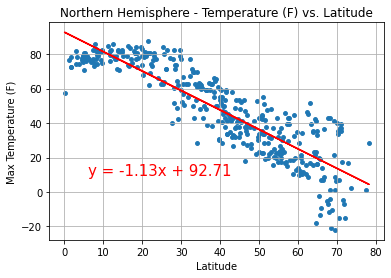

<Figure size 432x288 with 0 Axes>

In [52]:
x = pd.to_numeric(nor_hem_df["Latitude"]).astype(float)
y = pd.to_numeric(nor_hem_df["Max Temperature"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, marker= "o", s= 15)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize= 15, color= "red")

plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()
plt.tight_layout()

Regression line equation is: y = 0.39x + 81.08
The r-squared is: 0.583156905453914
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


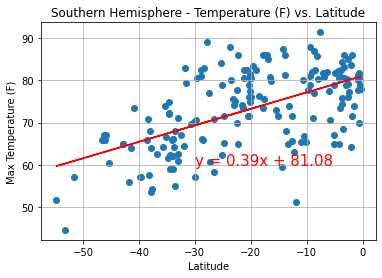

<Figure size 432x288 with 0 Axes>

In [53]:
x = pd.to_numeric(so_hem_df["Latitude"]).astype(float)
y = pd.to_numeric(so_hem_df["Max Temperature"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-30, 60), fontsize= 15, color= "red")

plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()
plt.tight_layout()